In [8]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

# Load dataset
df_pie = pd.read_csv('Econ.csv', sep=',')

df_pie['QatarGDPpercapita'] = df_pie['QatarGDPpercapita'].astype(float)
df_pie['WorldGDPpercapita'] = df_pie['WorldGDPpercapita'].astype(float)
df_pie['Year'] = df_pie['Year'].astype(int)
df_pie['CrudeOilPrices'] = df_pie['CrudeOilPrices'].astype(float)


print(df_pie.shape)
df_pie

#to read your own dataset, put the CSV file in the same folder as this code, below is an example of how to read it
#dataset = pd.read_csv("advertising.csv")
# To see the first few observations do dataset.head()

(29, 4)


,QatarGDPpercapita,WorldGDPpercapita,Year,CrudeOilPrices
0,15454.0,4299.0,1990,21.73
1,14129.0,4411.0,1991,18.73
2,15434.0,4655.0,1992,18.21
3,14270.0,4662.0,1993,16.13
4,14544.0,4957.0,1994,15.54
5,15849.0,5439.0,1995,17.14
6,17337.0,5481.0,1996,20.62
7,21104.0,5384.0,1997,18.49
8,18593.0,5297.0,1998,12.07
9,21723.0,5424.0,1999,17.27


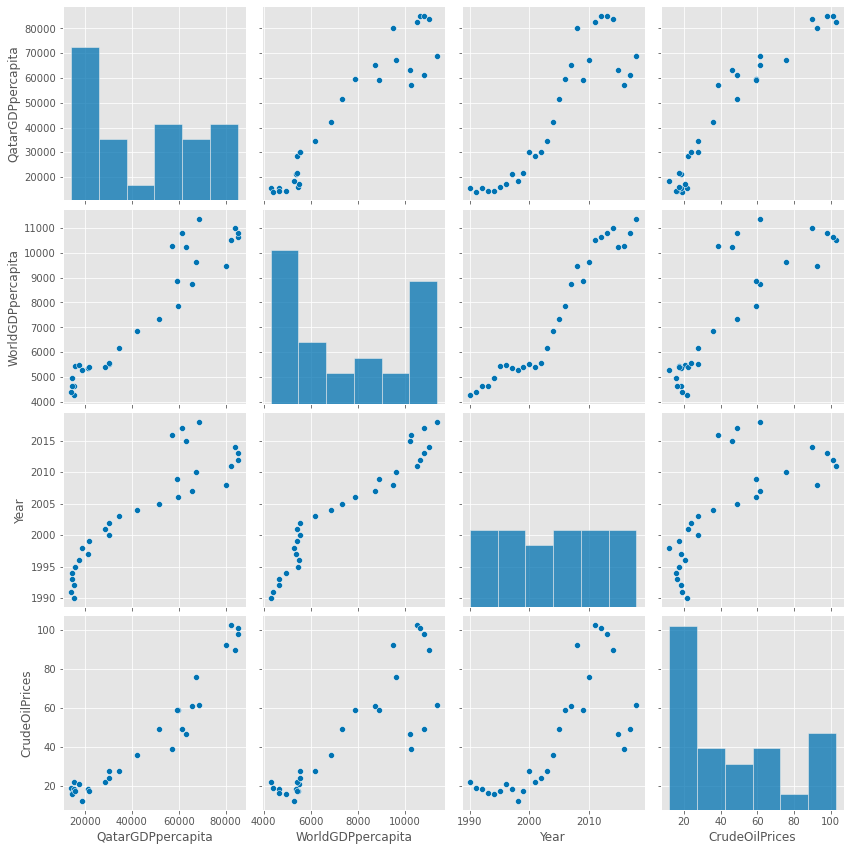

In [9]:
# Visualize the data using scatter plot and histogram
sns.set_palette('colorblind')
sns.pairplot(data=df_pie, height=3)

In [10]:
# Set independent and dependent variables, this has to be changed


X = df_pie[['CrudeOilPrices','WorldGDPpercapita','Year']]
y = df_pie['QatarGDPpercapita']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: -3000544.742230151
Coefficients: [ 5.98207686e+02 -1.19178038e+00  1.51081452e+03]


Pearson correlation coefficient matrix of each variables:
                    QatarGDPpercapita  CrudeOilPrices  WorldGDPpercapita  \
QatarGDPpercapita           1.000000        0.956617           0.951369   
CrudeOilPrices              0.956617        1.000000           0.859537   
WorldGDPpercapita           0.951369        0.859537           1.000000   
Year                        0.896922        0.746501           0.962348   

                       Year  
QatarGDPpercapita  0.896922  
CrudeOilPrices     0.746501  
WorldGDPpercapita  0.962348  
Year               1.000000  


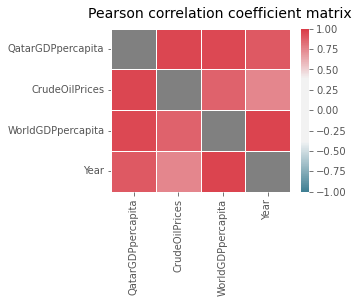

In [56]:
#This has to be changed
corr = df_pie[['QatarGDPpercapita', 'CrudeOilPrices', 'WorldGDPpercapita','Year']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()

In [57]:
#This has to be changed
X = df_pie[['price', 'advertising']]
X = sm.add_constant(X) # adding a constant

#this has to be changed
olsmod = sm.OLS(df_pie['QatarGDPpercapita'], X).fit()
print(olsmod.summary())

KeyError: "None of [Index(['price', 'advertising'], dtype='object')] are in the [columns]"